# Classifier Creation
Imports:

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from joblib import dump

Read data from processed .csv file and assign feature and label variables

In [2]:
df = pd.read_csv('data/twitter_processed.csv')
y = df['status']
X = df['text']

X.head()

0    london man believed to be second patient to be...
1    three dead after truck driven into stockholm s...
2    thousands are rallying against racism in macer...
3    irma gets stronger potential cat hurricane bar...
4    hurricane irma intensifying to category miami ...
Name: text, dtype: object

Create TfidfVectorizer object and obtain sparse matrix

In [3]:
td  = TfidfVectorizer()
X = td.fit_transform(X)

pd.DataFrame.sparse.from_spmatrix(X).head()

,0,1,2,3,4,5,6,7,8,9,...,11703,11704,11705,11706,11707,11708,11709,11710,11711,11712
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create training and test data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

pd.DataFrame.sparse.from_spmatrix(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,11703,11704,11705,11706,11707,11708,11709,11710,11711,11712
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create Naive-Bayes classifier and train with training data

In [5]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

Make some predictions

In [6]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

Generate classification report based on test data

In [7]:
classification_report = classification_report(y_test, y_pred)

print()
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print()
print(f'Classification Report:')
print(f'======================================================')
print(f'{classification_report}')
print(f'======================================================')


Accuracy: 0.8720867208672086

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1330
           1       0.95      0.57      0.71       515

    accuracy                           0.87      1845
   macro avg       0.90      0.78      0.82      1845
weighted avg       0.88      0.87      0.86      1845



Generate Confusion Matrix for classifier based on test data

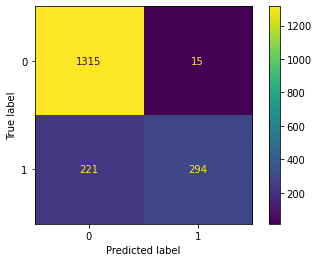

In [8]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

Dump trained classifier to file

In [ ]:
dump(clf, 'models/tfidf_nb')